In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import librosa

[-0.13281433 -0.19079727 -0.19583562 ...  0.08588138  0.040711
  0.01581939]
1326600


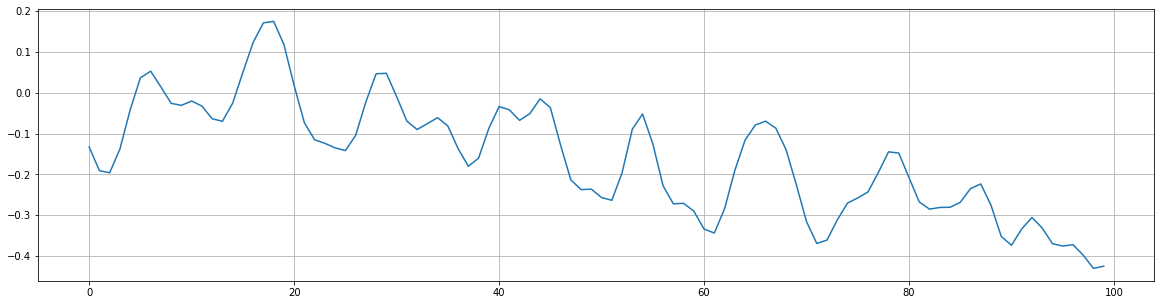

In [19]:
#loading the audio file into timeseriesarray x and samplingrate sr using defalut sr of 22100
audio_data="C:/Users/Srishti Ganguly/Documents/Workspace/4th year project/data/genres_original/country/country.00000.wav"
x, sr = librosa.load(audio_data, 44100)
print(x)
print(len(x))
plt.figure(figsize=(20, 5))
plt.plot(x[0:100])
plt.grid()

In [15]:
#extracting the zerocrossingrate feature
zcr=librosa.feature.zero_crossing_rate(x)
print(zcr)
avgzcr = np.mean(zcr)
stdzcr = np.std(zcr)
print("Average ZCR:",avgzcr)
print("Standard ZCR:",stdzcr)
mydict = [{'Name':'country.00000','zcr_mean':avgzcr,'zcr_std':stdzcr}]
#to append
#mydict.append({'Name':'country.00002', 'zcr_mean':avgzcr, 'zcr_std':stdzcr})

[[0.01660156 0.02197266 0.02539062 ... 0.09179688 0.06640625 0.04248047]]
Average ZCR: 0.05785134397907021
Standard ZCR: 0.024834684166293048


In [6]:
#storingvaluesintocsv
import csv
Field = ['Name', 'zcr_mean', 'zcr_std']
with open('mycsv.csv','w',newline='') as csvfile:
    writerobj = csv.DictWriter(csvfile, fieldnames = Field)
    writerobj.writeheader()
    writerobj.writerows(mydict)